In [28]:
import pandas as pd
import numpy as np


In [29]:
df = pd.read_csv('/content/flights.csv')
airlines = pd.read_csv('/content/airlines.csv')
airports = pd.read_csv('/content/airports.csv')


/tmp/ipython-input-4026617578.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/flights.csv')


In [30]:
# See top rows and data types
print(df.head())
print(df.info())
print(df.describe())


   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -

# **Cleaning Data**

## Removing Unwanted Columns

In [31]:
columns_to_drop = ['TAIL_NUMBER', 'CANCELLATION_REASON', 'SECURITY_DELAY','FLIGHT_NUMBER','WHEELS_OFF','WHEELS_ON','TAXI_OUT','TAXI_IN','ELAPSED_TIME','AIR_TIME','SCHEDULED_TIME','DISTANCE']  # Adjust as needed
df = df.drop(columns=columns_to_drop, errors='ignore')


## Handle Missing Values

In [32]:
df = df.fillna(0)

## Remove Duplicates

In [33]:
df = df.drop_duplicates()

# **Merge Lookup Tables**

In [34]:
# Merge airline codes using 'AIRLINE' from df and 'IATA_CODE' from airlines
df = df.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')

# Merge airport codes using 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' from df and 'IATA_CODE' from airports
df = df.merge(airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left', suffixes=('', '_origin'))
df = df.merge(airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left', suffixes=('', '_dest'))

# **Feature Engineering / Transforming Data**

## Convert Data Types

In [37]:
df['DATE'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

## Create/Modify Columns

In [38]:
df['TOTAL_DELAY'] = df['DEPARTURE_DELAY'] + df['ARRIVAL_DELAY']


# **Analyze or Visualize**

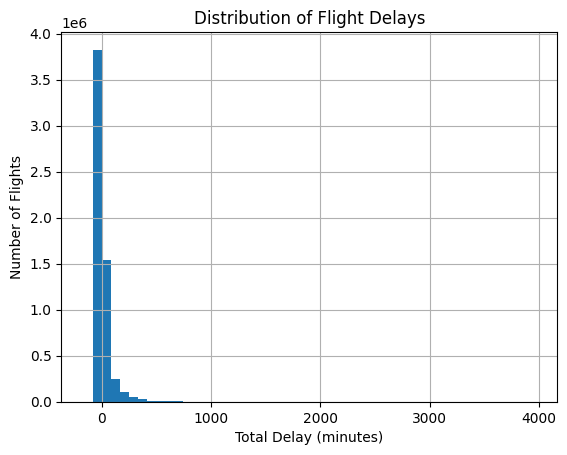

In [39]:
import matplotlib.pyplot as plt

df['TOTAL_DELAY'].hist(bins=50)
plt.xlabel('Total Delay (minutes)')
plt.ylabel('Number of Flights')
plt.title('Distribution of Flight Delays')
plt.show()


In [40]:
df.to_csv('/content/cleaned_data.csv', index=False)
